In [1]:
# notebook configuration
%matplotlib inline

import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import Image


# define general parameters for plots
plt.rcParams["figure.figsize"] = (12.0, 9.0)


In [2]:
def Reynolds(rho, vr, dp, mu):
    Re = rho*vr*dp/mu
    
    return Re

def Prandlt(cp, mu, k):
    Pr = cp*mu/k
    
    return Pr

def Grashof(L, rho, mu, Tw, Tinf):
    Tfilm = (Tw+Tinf)/2
    beta = 1/Tfilm
    Gr = (L*L*L*9.81*beta*(Tw-Tinf)*rho*rho)/(mu*mu)
        
    return Gr

def Rayleight(Gr, Pr):
    Ra = Gr*Pr
        
    return Ra

def NusseltGunn(Re, Pr, alpha_f):

    Nu = (7.0 - 10.0 * alpha_f + 5.0 * alpha_f * alpha_f) * (1.0 + 0.7 * np.power(Re, 0.2) * np.power(Pr, 0.3333333333)) + \
    (1.33 - 2.4 * alpha_f + 1.2 * alpha_f * alpha_f) * np.power(Re, 0.7) * np.power(Pr, 0.3333333333)

    return Nu

def h_average(Nu, dp, k):
    h = Nu*k/dp
    
    return h

def Biot(dp, h, ks):
    Bi = dp*h/ks
    
    return Bi

In [14]:
# loading the digitized data
case1_data = open("average_temp_bed2.txt", 'r')
#time_case1, temp_case1 = np.loadtxt(case1_data, delimiter = '\t', skiprows = 1, unpack = True)    
time_case1o, temp_case1o = np.loadtxt(case1_data, delimiter = ';', skiprows = 1, unpack = True)    
case1_data.close()

case1 = open("netl-case1-standard-averageTemp.csv", 'r')
time_case1, temp_case1 = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("netl-case1-improved-averageTemp.csv", 'r')
time_case1i, temp_case1i = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1b = open("netl-case1b-standard-aveTemp.csv", 'r')
time_case1b, temp_case1b = np.loadtxt(case1b, delimiter = ',', skiprows = 1, unpack = True)    
case1b.close()

temp_adimensional = (temp_case1-283.15)/(323.15-283.15)
time = time_case1


In [29]:
#properties
particle_diameter = 3.256/1000 #m
particle_density = 1131 #kg/m3
particle_thermal_conductivity = 0.25 #W/mK
particle_higher_thermal_conductivity = particle_thermal_conductivity/5.0 #W/mK
print("Smaller Thermal_conductivity = ",particle_higher_thermal_conductivity)
particle_specific_heat  = 1600 #J/kg K
particle_poisson_ratio = 0.4 #

gas_density = 1.2041 #kg/m3
gas_viscosity = 1.90/100000 #pa.s
gas_specific_heat = 1000 #J/kg K
gas_thermal_conductivity = 0.024 #W/ mK

case1_final_velocity = 2.179 #m/s
case2_final_velocity = 3.28 #m/s
case3_final_velocity = 4.358 #m/s

alpha_f = 1 - 0.39

#case1
case1_Re = Reynolds(gas_density, case1_final_velocity, particle_diameter, gas_viscosity)
print("case1_Re = ", case1_Re)
case1_Pr = Prandlt(gas_specific_heat, gas_viscosity, gas_thermal_conductivity)
print("case1_Pr = ", case1_Pr)
Nusselt_case1 = NusseltGunn(case1_Re, case1_Pr, alpha_f)
print("Nusselt_case1 = ", Nusselt_case1)
h_case1 = h_average(Nusselt_case1, particle_diameter, gas_thermal_conductivity)
print("h_case1 = ", h_case1)
Biot_case1 = Biot(particle_diameter, h_case1, particle_thermal_conductivity)
print("Biot_case1 = ", Biot_case1,  "\n")

#case2
case2_Re = Reynolds(gas_density, case2_final_velocity, particle_diameter, gas_viscosity)
print("case1_Re = ", case2_Re)
case2_Pr = Prandlt(gas_specific_heat, gas_viscosity, gas_thermal_conductivity)
print("case1_Pr = ", case2_Pr)
Nusselt_case2 = NusseltGunn(case2_Re, case2_Pr, alpha_f)
print("Nusselt_case1 = ", Nusselt_case2)
h_case2 = h_average(Nusselt_case2, particle_diameter, gas_thermal_conductivity)
print("h_case1 = ", h_case2)
Biot_case2 = Biot(particle_diameter, h_case2, particle_thermal_conductivity)
print("Biot_case1 = ", Biot_case2,  "\n")

#case3
case3_Re = Reynolds(gas_density, case3_final_velocity, particle_diameter, gas_viscosity)
print("case1_Re = ", case3_Re)
case3_Pr = Prandlt(gas_specific_heat, gas_viscosity, gas_thermal_conductivity)
print("case1_Pr = ", case3_Pr)
Nusselt_case3 = NusseltGunn(case3_Re, case3_Pr, alpha_f)
print("Nusselt_case1 = ", Nusselt_case3)
h_case3 = h_average(Nusselt_case3, particle_diameter, gas_thermal_conductivity)
print("h_case1 = ", h_case3)
Biot_case3 = Biot(particle_diameter, h_case3, particle_thermal_conductivity)
print("Biot_case3 = ", Biot_case3, "\n")

#case1b
case1b_Re = Reynolds(gas_density, case1_final_velocity, particle_diameter, gas_viscosity)
print("case1b_Re = ", case1b_Re)
case1b_Pr = Prandlt(gas_specific_heat, gas_viscosity, gas_thermal_conductivity)
print("case1b_Pr = ", case1b_Pr)
Nusselt_case1b = NusseltGunn(case1b_Re, case1b_Pr, alpha_f)
print("Nusselt_case1b = ", Nusselt_case1b)
h_case1b = h_average(Nusselt_case1b, particle_diameter, gas_thermal_conductivity)
print("h_case1b = ", h_case1b)

Biot_case1b = Biot(particle_diameter, h_case1b, particle_higher_thermal_conductivity)
print("Biot_case1b = ", Biot_case1b)

Smaller Thermal_conductivity =  0.05
case1_Re =  449.62513570526306
case1_Pr =  0.7916666666666665
Nusselt_case1 =  29.6251356106
h_case1 =  218.367092953
Biot_case1 =  2.84401301861 

case1_Re =  676.8106677894737
case1_Pr =  0.7916666666666665
Nusselt_case1 =  37.0365292902
h_case1 =  272.996530395
Biot_case1 =  3.55550681186 

case1_Re =  899.2502714105261
case1_Pr =  0.7916666666666665
Nusselt_case1 =  43.5164241275
h_case1 =  320.759883004
Biot_case3 =  4.17757671624 

case1b_Re =  449.62513570526306
case1b_Pr =  0.7916666666666665
Nusselt_case1b =  29.6251356106
h_case1b =  218.367092953
Biot_case1b =  14.2200650931


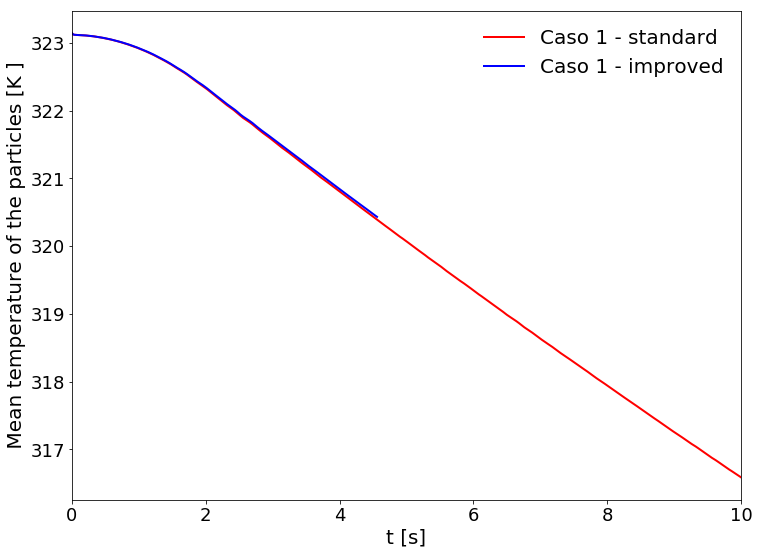

In [30]:
#plt.plot(time_case1o,  temp_case1o, linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Caso 1 - old")
plt.plot(time_case1,  temp_case1, linestyle = "-", color = "red", marker = 'None', linewidth = 2,label = "Caso 1 - standard")
plt.plot(time_case1i,  temp_case1i, linestyle = "-", color = "blue", marker = 'None', linewidth = 2,label = "Caso 1 - improved")
#plt.plot(time_case1b,  temp_case1b, linestyle = "-", color = "pink", marker = 'None', linewidth = 2,label = "Caso 1b - standard")


#plt.title("Vertical velocity ", fontsize = 16)
plt.xlabel("t [s]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Mean temperature of the particles [K ] ", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.xlim(0, 10)     
#plt.ylim(0.9, 4.0) 
plt.savefig("bed_temperature.png")
plt.show()

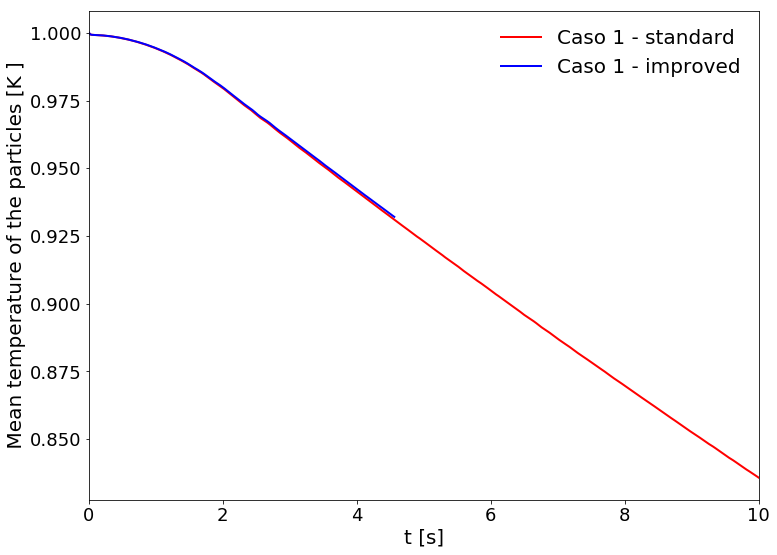

In [17]:
#plt.plot(time_case1o,  temp_case1o, linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Caso 1 - old")
plt.plot(time_case1,  (temp_case1-283.15)/(323.15-283.15), linestyle = "-", color = "red", marker = 'None', linewidth = 2,label = "Caso 1 - standard")
plt.plot(time_case1i,  (temp_case1i-283.15)/(323.15-283.15), linestyle = "-", color = "blue", marker = 'None', linewidth = 2,label = "Caso 1 - improved")
#plt.plot(time_case1b,  (temp_case1b-283.15)/(323.15-283.15), linestyle = "-", color = "pink", marker = 'None', linewidth = 2,label = "Caso 1b - standard")


#plt.title("Vertical velocity ", fontsize = 16)
plt.xlabel("t [s]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Mean temperature of the particles [K ] ", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.xlim(0, 10)     
#plt.ylim(0.9, 4.0) 
plt.savefig("bed_temperature.png")
plt.show()